# GENRE CLASSIFICATION
## [SPOTIFY TRACKS DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)


In [1]:
import pandas as pd


#Data Characteristics
spotify_data = pd.read_csv("SpotifyFeatures.csv")
display(spotify_data.head())
display(spotify_data.info())
display(spotify_data.describe())
print("\nUnique genres: ", pd.unique(spotify_data['genre']))


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

None

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000



Unique genres:  ['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']


## Encoding:
artist_name: remove 
track_name: remove  
track_id: remove  
key: 1 hot encode it  
mode: Binary Encode: Major = 1, Minor = 0  
time_signature: Will convert to linear scale  
genres: Will one hot encode genres  
Condense duplicates and one hot encode songs to show multiple genres  


In [2]:
def one_hot_encode(df, column_name):
    """
    Function to one hot encode a column and remove the old column from data frame
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with one hot encoded columns
    """
    df_one_hot = df.copy()
    df_one_hot = pd.concat([df_one_hot,pd.get_dummies(df_one_hot[column_name], prefix=column_name)],axis=1)
    df_one_hot.drop([column_name],axis=1, inplace=True)
    return df_one_hot



In [3]:
#Factorized Data
#Factorize columns that are strings
def factorized_column(df, column_name):
    """
    Function to factorize a column in a pandas dataframe
    :param df: pandas data frame that needs encoding
    :param column_name: name of column
    :returns: pandas data frame with factorized column and mapping of encoding
    """
    df_factorized = df.copy()
    df_factorized[column_name], mapping = pd.factorize(df[column_name])
    return df_factorized, mapping



In [4]:
#Checking for incomplete data
print("Amount of Null in Data: ", spotify_data.isnull().sum().sum())
print("Amount of N/A in Data: ", spotify_data.isna().sum().sum())
print("No incomplete data")

#Encoding Data as per Encoding Section
spotify_data_encoded = spotify_data.copy()
spotify_data_encoded = one_hot_encode(spotify_data_encoded,'key')
spotify_data_encoded = one_hot_encode(spotify_data_encoded,'genre')

mode_dictionary = {'Major' : 1, 'Minor' : 0}
spotify_data_encoded['mode'].replace(mode_dictionary, inplace=True)
time_dictionary = {'0/4' : 0, '1/4' : 1, '3/4': 1, '4/4': 4,'5/4': 5}
spotify_data_encoded['time_signature'].replace(time_dictionary, inplace=True)
print("Encoded key, genre, mode, time_signature")

genre_column_list = []
for genre in pd.unique(spotify_data['genre']):
    genre_column_list.append("genre_"+genre)

#Deleting Duplicates in data with exact values in track_id
#Spotify will categorize 1 unique song into multiple genres
#We will take the first genre that the song is categorized into
spotify_data_encoded = spotify_data_encoded.drop_duplicates(subset='track_id', keep='first')

#Consolodating duplicate tracks to 1 row with one hot encoding of genres
#Will take some time
print("Starting to make track dictionary")
trackid_to_genre_dict = {}
for index, row in spotify_data.iterrows():
    track_id = row['track_id']
    genre = row['genre']
    if track_id in trackid_to_genre_dict:
        trackid_to_genre_dict[track_id].append(genre)
    else:
        trackid_to_genre_dict[track_id] = [genre]
#display(trackid_to_genre_dict)
print("Done making track dictionary")

print("Starting to condense tracks to encoded dataframe")

for index, row in spotify_data_encoded.iterrows():    
    track_id = row['track_id']
    genre_list = trackid_to_genre_dict[track_id]
    for genre in genre_list:
        genre_label = "genre_"+ genre
        spotify_data_encoded.at[index,genre_label] = 1

print("Done condensing tracks to encoded dataframe")

print("Total Songs that were removed due to duplication: ", (spotify_data.shape[0] - spotify_data_encoded.shape[0]))
spotify_data_encoded.drop(['track_name'],axis=1, inplace=True)
spotify_data_encoded.drop(['track_id'],axis=1, inplace=True)
spotify_data_encoded.drop(['artist_name'],axis=1, inplace=True)



"""
#Failed attempts
#Takes way too long

unique_track_list = spotify_data_encoded['track_id']
for track in unique_track_list:
    query_df = spotify_data_encoded.query('track_id == "'+ str(track) + '"')
    for genre in genre_column_list:
        has_true = (query_df[genre] == 1).tolist()
        if True in has_true:
            for index in query_df.index.values.tolist():
                spotify_data_encoded.at[index,genre]=1

Another attempt to get rows done
for index, row in spotify_data.iterrows():
    if(index%1000 == 0):
        print(index)
    track_id = row['track_id']
    index_track = spotify_data_non_duplicates.index[spotify_data_non_duplicates['track_id'] == track_id].tolist()[0]
    genre = row['genre']
    genre_label = "genre_"+ genre
    spotify_data_non_duplicates.at[index_track,genre_label] = 1
"""
print("\nspotify_data_encoded is clean data")
print("\nspotify_data is original data")


Amount of Null in Data:  0
Amount of N/A in Data:  0
No incomplete data
Encoded key, genre, mode, time_signature
Starting to make track dictionary
Done making track dictionary
Starting to condense tracks to encoded dataframe
Done condensing tracks to encoded dataframe
Total Songs that were removed due to duplication:  55951

spotify_data_encoded is clean data

spotify_data is original data


In [19]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

spotify_features = spotify_data_encoded.drop(genre_column_list,axis=1)
spotify_target = spotify_data_encoded[genre_column_list]

scaler.fit(spotify_features)
spotify_data_scaler = scaler.transform(spotify_features)
spotify_data_scaler = pd.DataFrame(spotify_data_scaler, index=spotify_features.index, columns=spotify_features.columns)

display(spotify_data_scaler.head())
display(spotify_target.head())


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,-2.085747,0.564740,-0.798733,-1.047822,1.279646,-0.532841,0.575611,1.299283,0.718210,-0.366515,...,-0.280487,-0.366868,3.080147,-0.34336,-0.186793,-0.286485,-0.311165,-0.262123,-0.361948,-0.259774
1,-2.028246,-0.431708,0.257016,-0.756663,0.652467,-0.532841,-0.348444,0.715907,-1.392351,-0.198661,...,-0.280487,-0.366868,-0.324660,-0.34336,-0.186793,-0.286485,-0.311165,3.815003,-0.361948,-0.259774
2,-1.913244,1.495668,0.640447,-0.504626,-1.544471,-0.532841,-0.575904,-0.585001,-1.392351,-0.446282,...,-0.280487,2.725776,-0.324660,-0.34336,-0.186793,-0.286485,-0.311165,-0.262123,-0.361948,-0.259774
3,-2.085747,0.815900,-1.581352,-0.641318,-0.837536,-0.532841,-0.597228,-0.319034,0.718210,-0.430133,...,-0.280487,-0.366868,3.080147,-0.34336,-0.186793,-0.286485,-0.311165,-0.262123,-0.361948,-0.259774
4,-1.855743,1.490208,-1.103376,-1.176146,-1.203692,-0.151959,-0.106768,-1.721889,0.718210,-0.400281,...,-0.280487,-0.366868,-0.324660,-0.34336,-0.186793,-0.286485,3.213726,-0.262123,-0.361948,-0.259774


,genre_Movie,genre_R&B,genre_A Capella,genre_Alternative,genre_Country,genre_Dance,genre_Electronic,genre_Anime,genre_Folk,genre_Blues,...,genre_Pop,genre_Reggae,genre_Reggaeton,genre_Jazz,genre_Rock,genre_Ska,genre_Comedy,genre_Soul,genre_Soundtrack,genre_World
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


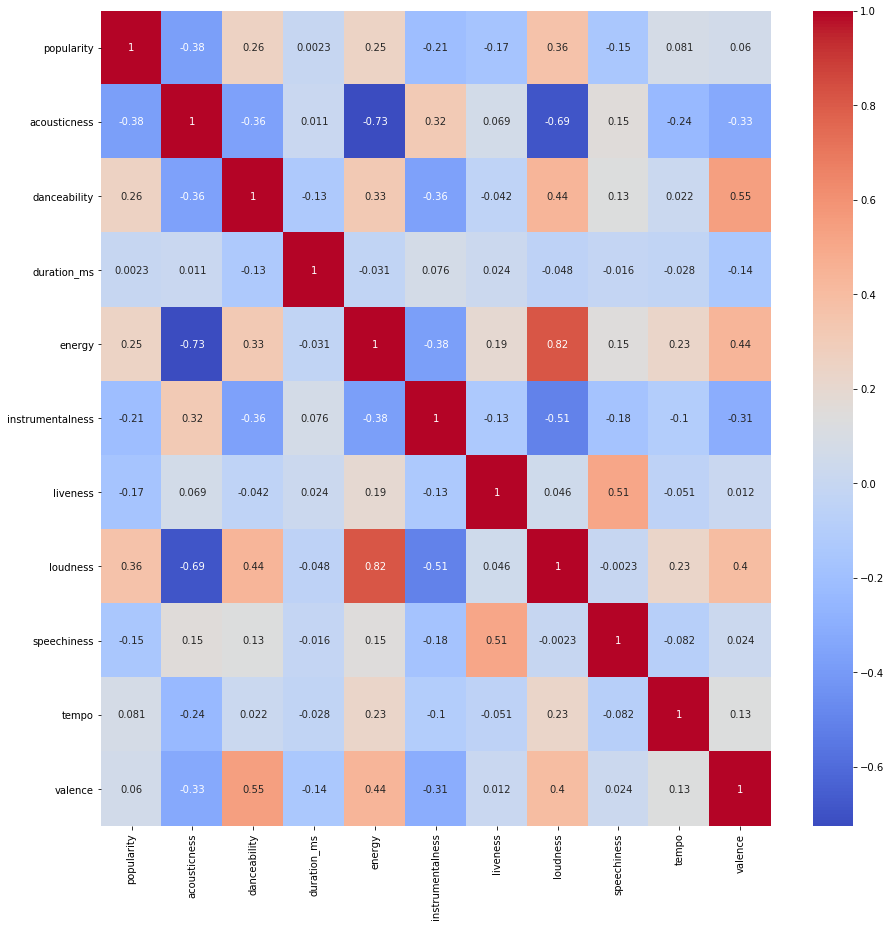

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
#Find Correlations within data and plotting them on heat map
corr_matric = spotify_data.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(corr_matric, annot=True, cmap="coolwarm")
plt.show()

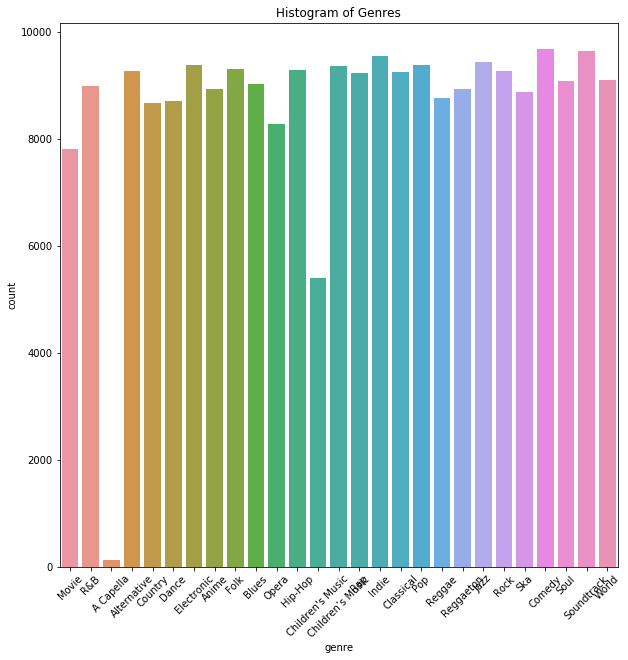

In [8]:
#Bar Chart to show distribution of Genres
plt.subplots(figsize=(10,10))
sn.countplot(spotify_data['genre'])
plt.title('Histogram of Genres')
plt.xticks(rotation=45)
plt.show()



In [21]:
#Test KNN on Data
#Starting Point for KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = spotify_data_scaler
target = spotify_target


k_neighbors = 3
neigh = KNeighborsClassifier(n_neighbors=k_neighbors)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33,random_state = 42)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))






0.29631788261108066


## TODO:

Adi:
PCA Visuals in 2 or 3 dimensions  
Main thing: all of one genre in one color  
KNN:  
new Accuracy metric, top 1 or 2 correct  
Grid search for hyper parameter training


Keeshan:
basic decision tree stuff  
multi class accuracy  
       convert to true or false  
       take all trues  
           keep them   
           40% of the total dataset  
           60% falses should be equally distributed in the 26 genres (not number but % distributed)  